
# **Background and Foreground Subtraction**

####**In this lesson we'll learn:**
1. Background Subtraction with Gaussian Mixture-based Background/Foreground Segmentation Algorithm
2. Improved adaptive Gausian mixture model for background subtraction

**Taken fron the OpenCV Docs**



Background subtraction (BS) is a common and widely used technique for generating a foreground mask (namely, a binary image containing the pixels belonging to moving objects in the scene) by using static cameras.

As the name suggests, BS calculates the foreground mask performing a subtraction between the current frame and a background model, containing the static part of the scene or, more in general, everything that can be considered as background given the characteristics of the observed scene.

![](https://docs.opencv.org/3.4/Background_Subtraction_Tutorial_Scheme.png)

Background modeling consists of two main steps:

1. Background Initialization;
2. Background Update.

In the first step, an initial model of the background is computed, while in the second step that model is updated in order to adapt to possible changes in the scene.


In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/walking_short_clip.mp4

--2024-05-03 10:04:53--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/walking_short_clip.mp4
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/walking_short_clip.mp4 [following]
--2024-05-03 10:04:53--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/walking_short_clip.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 181894 (178K) [application/octet-stream]
Saving to: ‘walking_short_clip.mp4’

walking_short_clip. 100%[===================>] 177.63K  --.-KB/s    in 0.02s   

2024-05-03 10:04:53 (10.5 MB/s) - ‘walk

# **What is Background Subtraction?**

Background subtraction is a computer vision technique where we seek to isolate the background from the 'moving' foreground. Consider vehciles traversing a roadway, or persons walking along a sidewalk.

It sounds simple in theory (i.e. just keep the station pixels and remove the ones that were changing). However, things like lighting condition changes, shadows etc. can make things get more complicated.

Several algorithms were introduced for this purpose. In the following, we will have a look at two algorithms from the **bgsegm** module.

### **Gaussian Mixture-based Background/Foreground Segmentation Algorithm**

In this paper, we propose a background subtraction (BGS) method based on the Gaussian mixture models using color and depth information. For combining color and depth information, we used the probabilistic model based on Gaussian distribution. In particular, we focused on solving color camouflage problem and depth denoising. For evaluating our method, we built a new dataset containing normal, color camouflage and depth camouflage situations. The dataset files consist of color, depth and ground truth image sequences. With these files, we compared the proposed algorithm with the conventional color-based BGS techniques in terms of precision, recall and F-measure. As a result, our method showed the best performance. Thus, this technique will help to robustly detect regions of interest as pre-processing in high-level image processing stages.


Link to Paper - https://www.researchgate.net/publication/283026260_Background_subtraction_based_on_Gaussian_mixture_models_using_color_and_depth_information



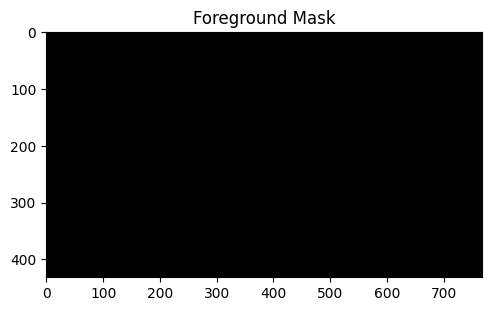

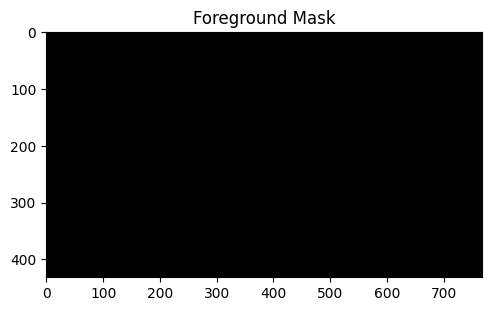

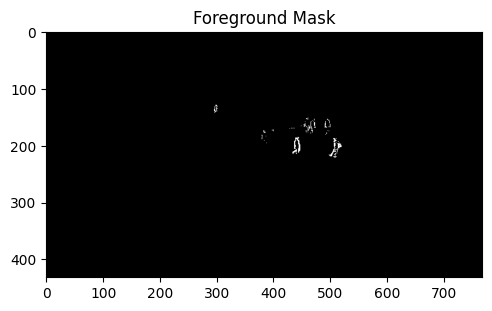

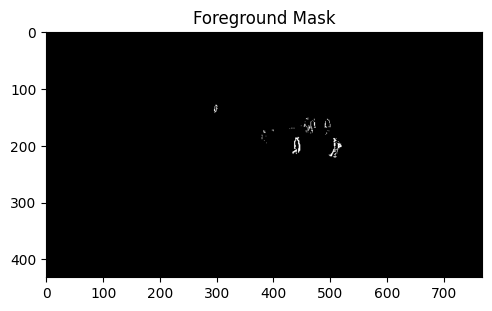

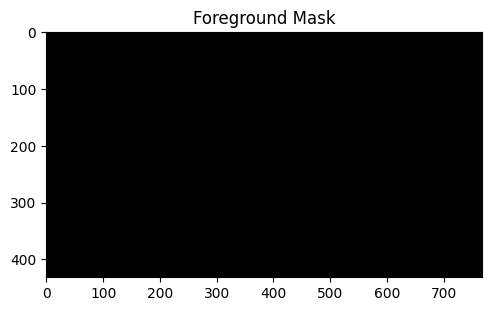

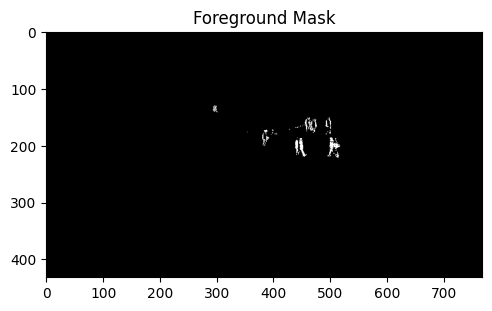

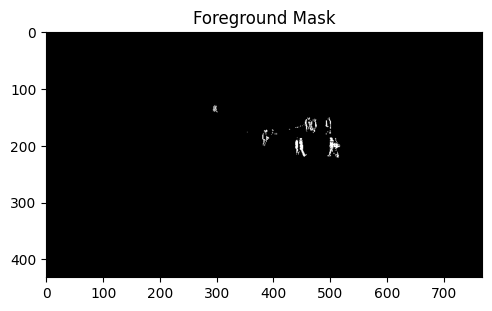

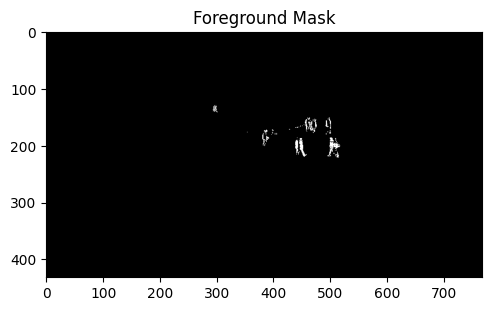

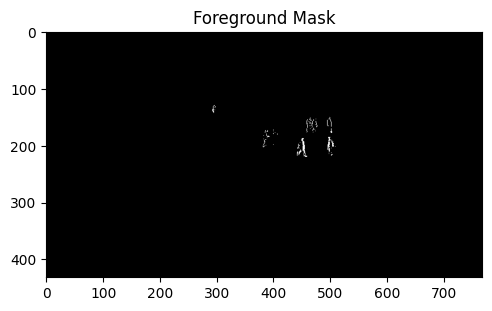

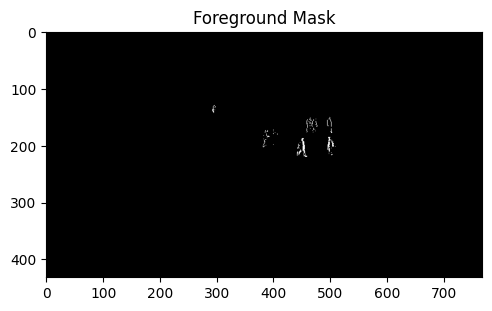

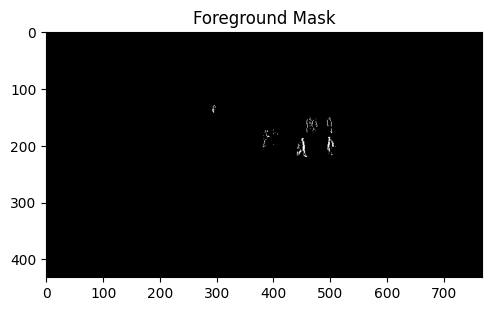

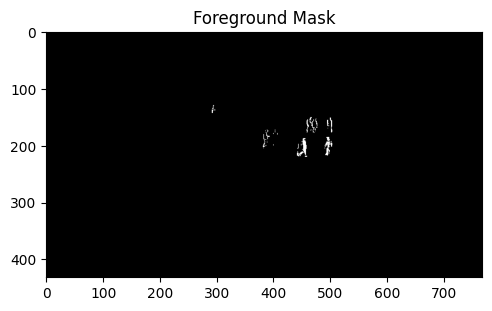

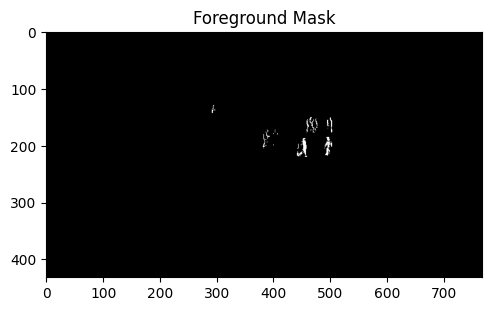

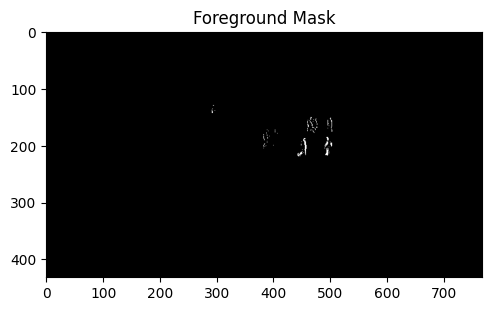

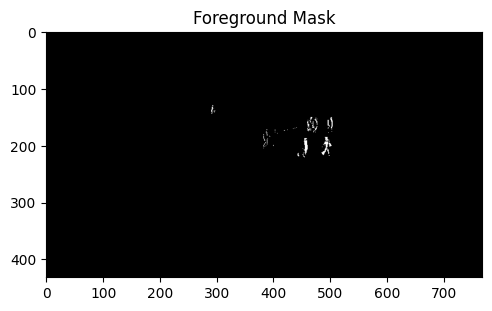

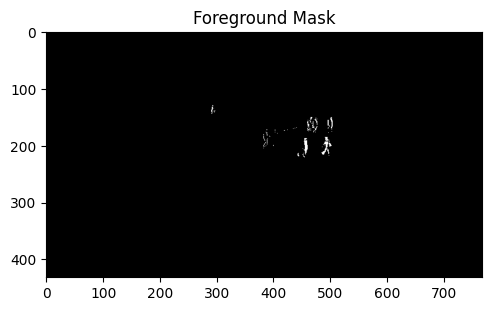

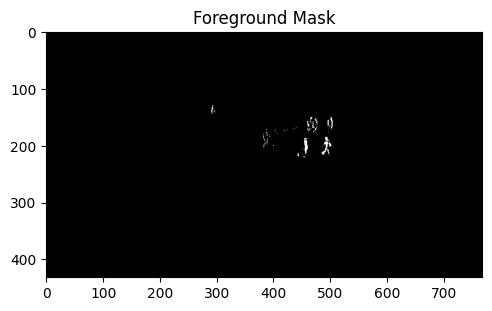

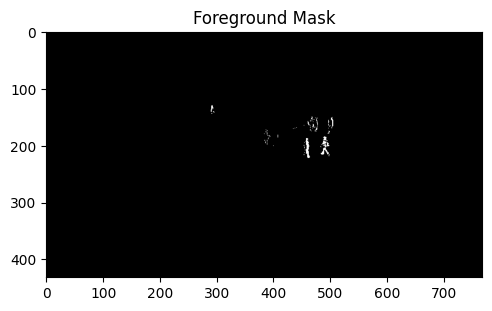

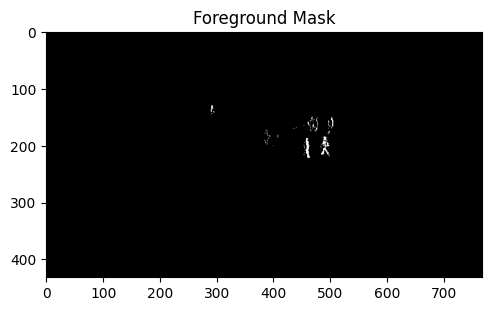

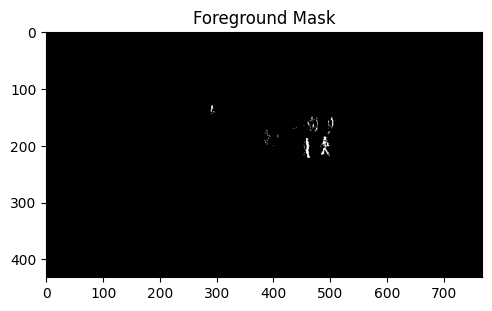

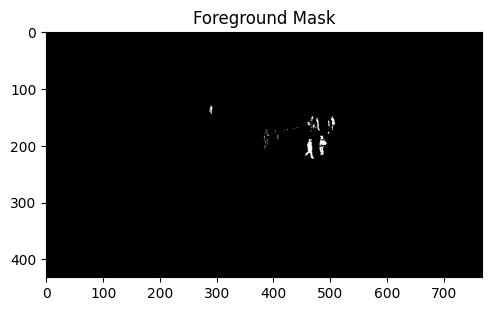

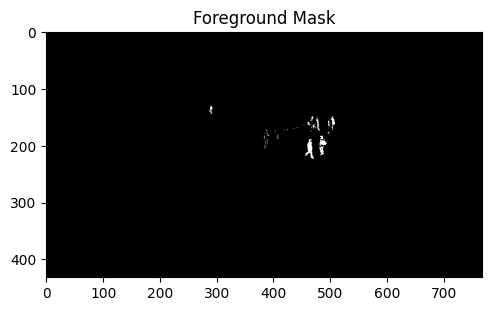

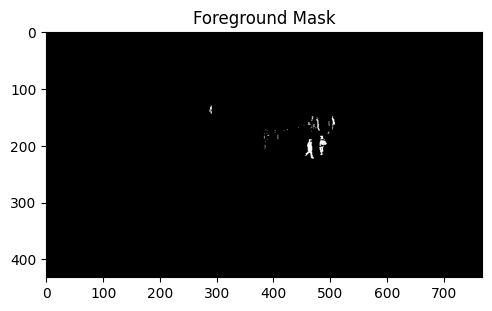

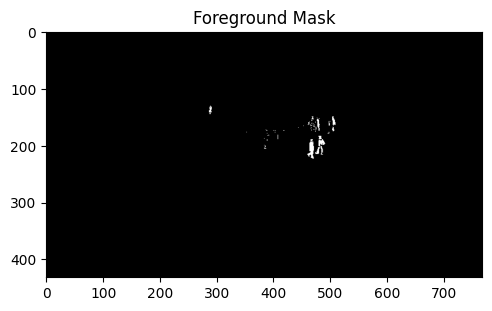

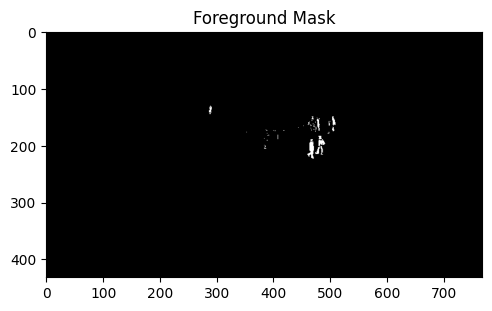

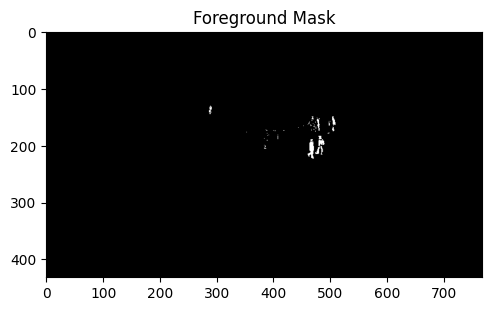

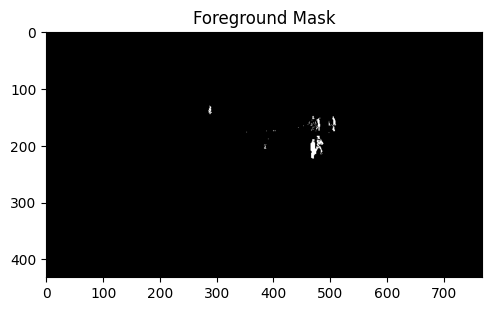

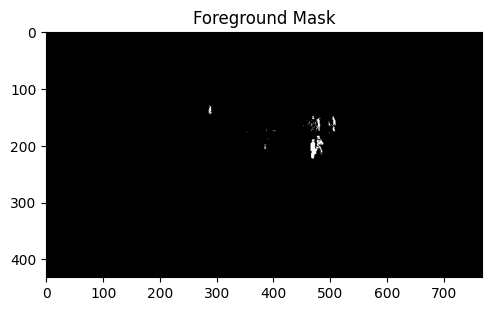

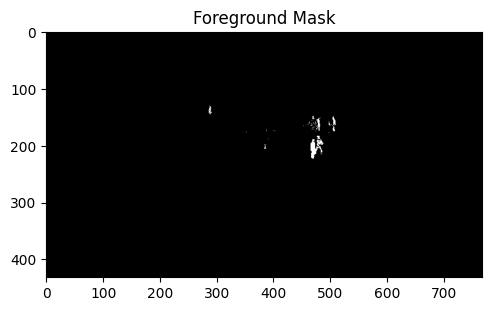

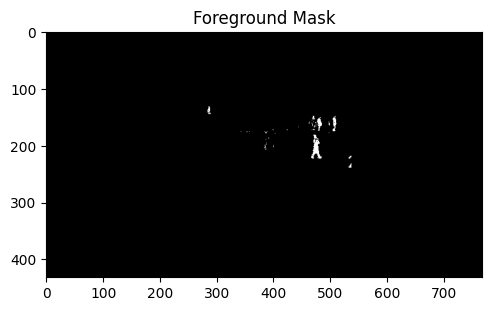

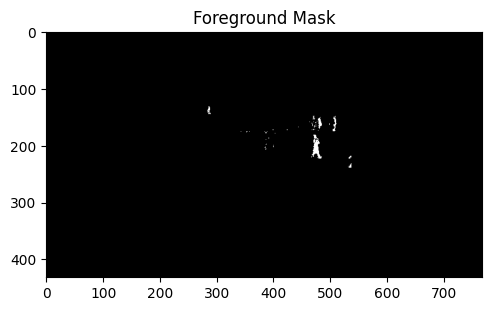

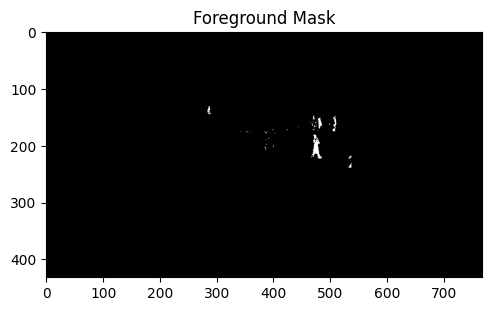

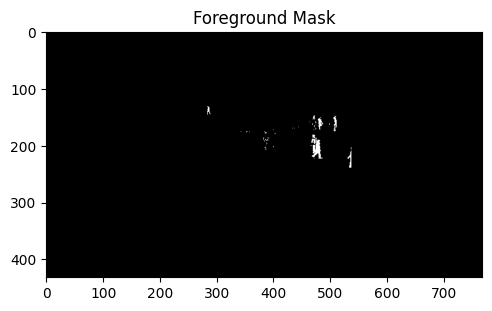

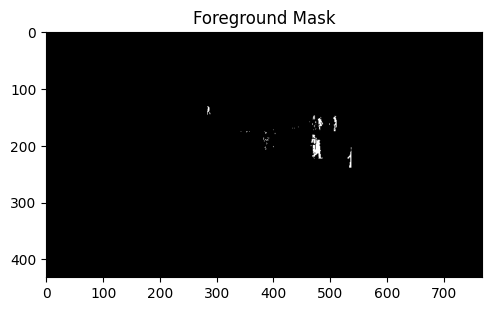

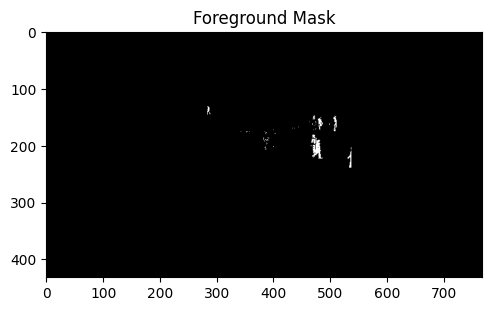

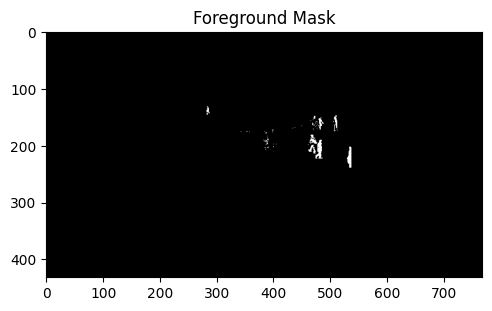

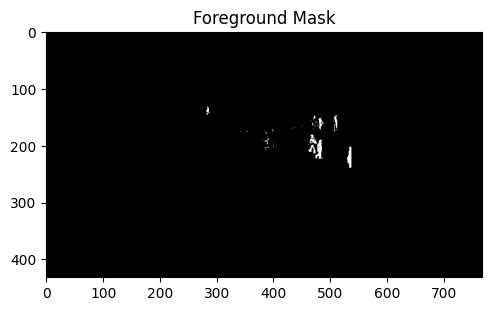

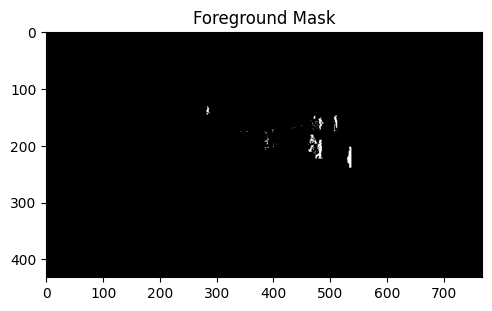

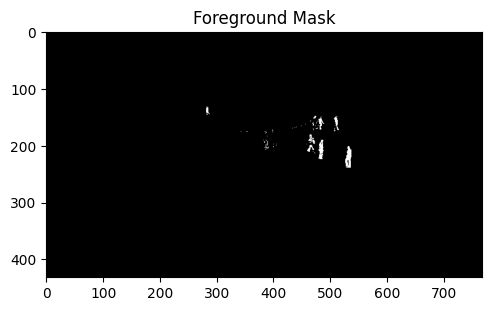

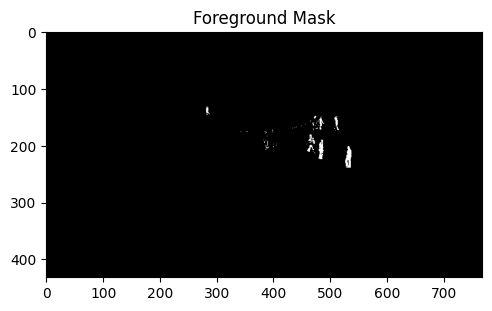

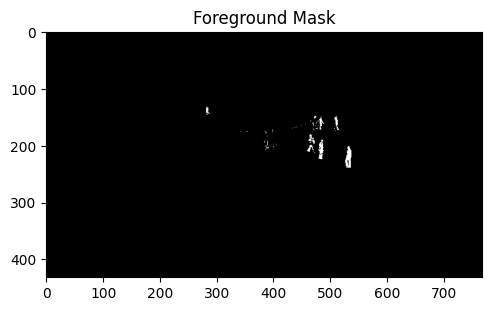

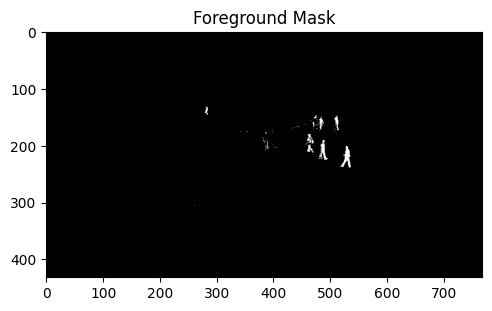

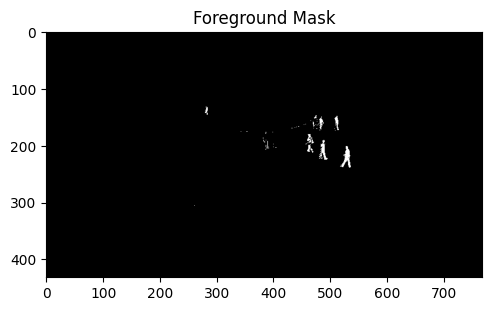

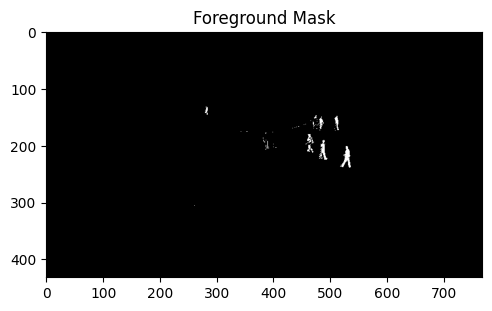

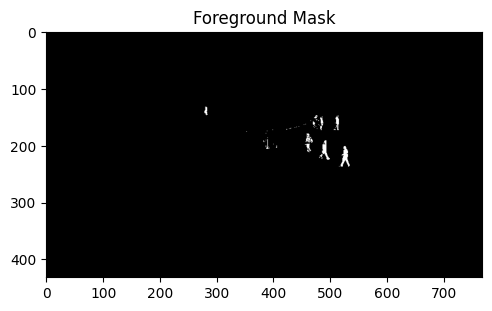

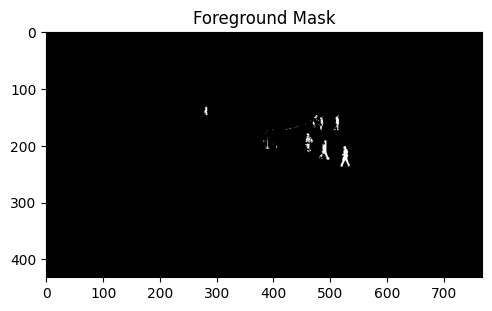

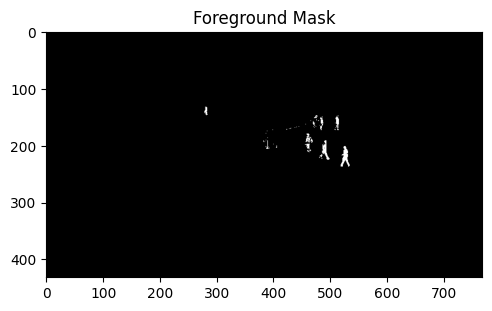

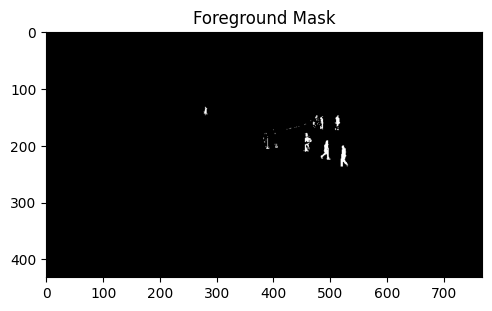

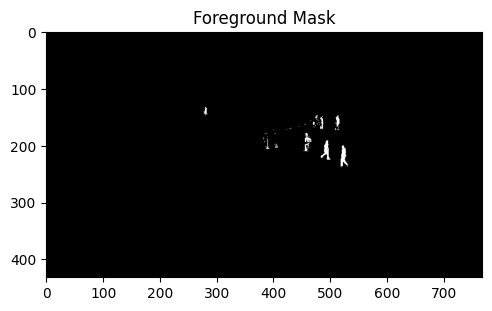

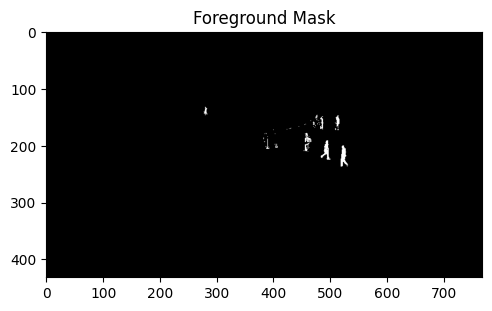

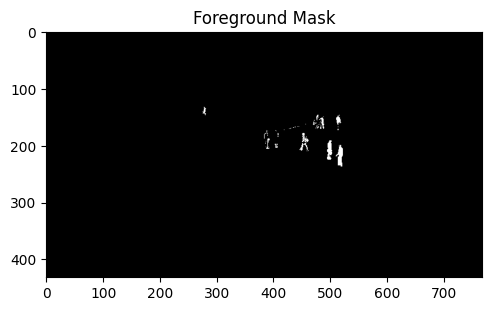

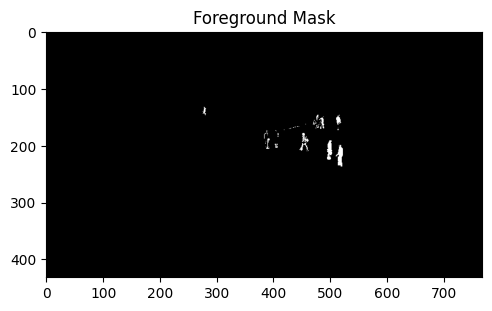

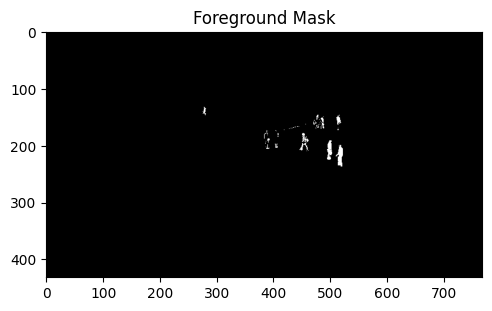

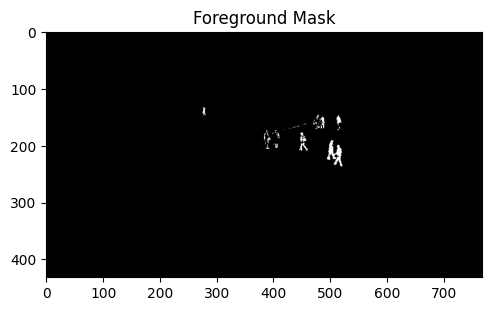

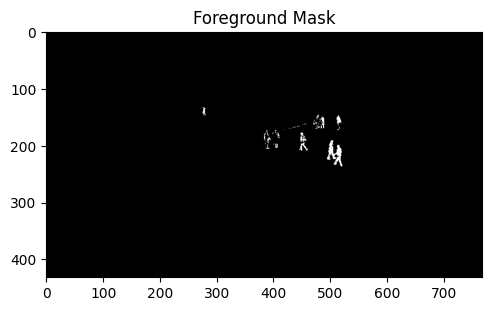

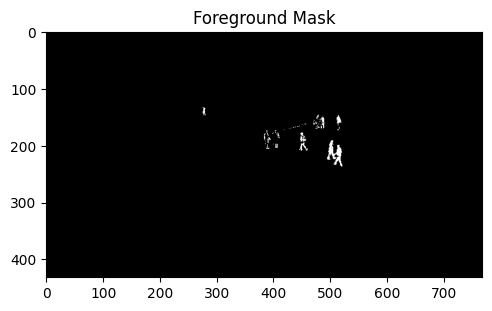

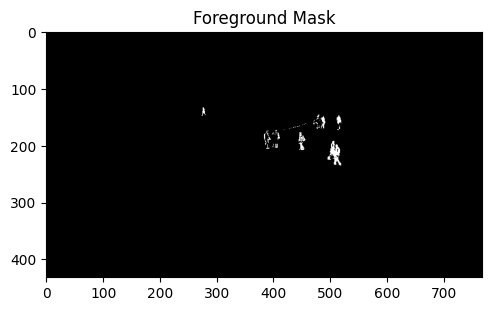

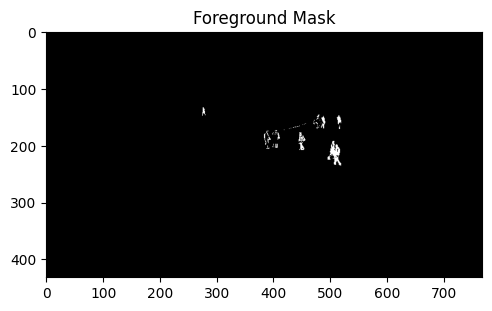

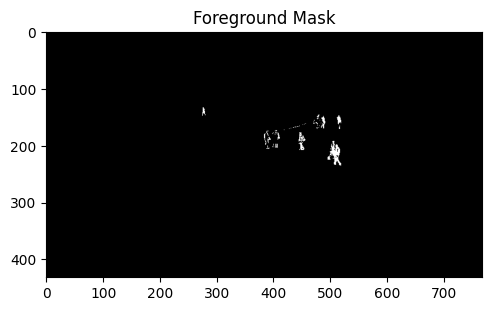

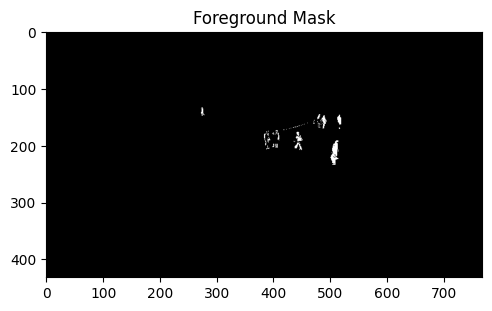

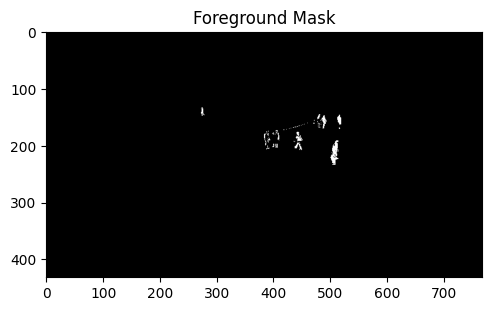

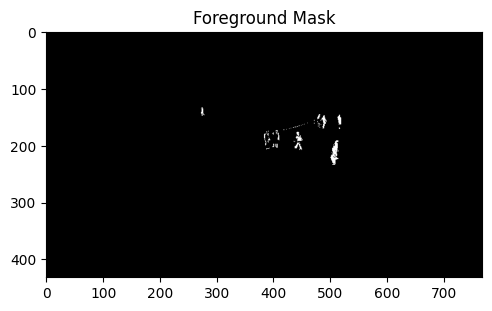

In [2]:
cap = cv2.VideoCapture('walking_short_clip.mp4')

# Get the height and width of the frame (required to be an interger)
w = int(cap.get(3))
h = int(cap.get(4))

# Define the codec and create VideoWriter object. The output is stored in '*.avi' file.
out = cv2.VideoWriter('walking_output_GM.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 30, (w, h))

# Initlaize background subtractor
foreground_background = cv2.bgsegm.createBackgroundSubtractorMOG()

# Loop once video is successfully loaded
while True:

    ret, frame = cap.read()

    if ret:
      # Apply background subtractor to get our foreground mask
      foreground_mask = foreground_background.apply(frame)
      out.write(foreground_mask)
      imshow("Foreground Mask", foreground_mask)
    else:
      break

cap.release()
out.release()

### **Let's try the Improved adaptive Gausian mixture model for background subtraction**

Background subtraction is a common computer vision task. We analyze the usual pixel-level approach. We develop an efficient adaptive algorithm using Gaussian mixture probability density. Recursive equations are used to constantly update the parameters and but also to simultaneously select the appropriate number of components for each pixel.

https://www.researchgate.net/publication/4090386_Improved_Adaptive_Gaussian_Mixture_Model_for_Background_Subtraction

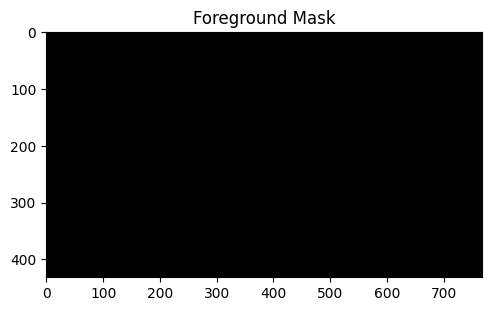

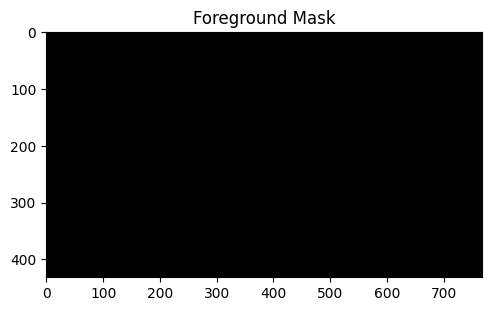

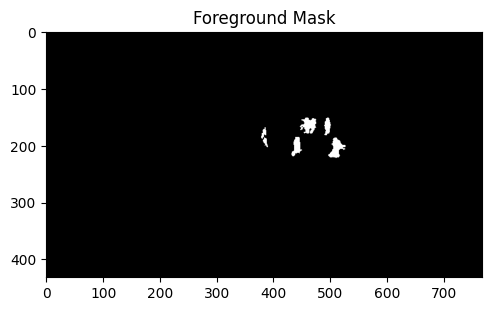

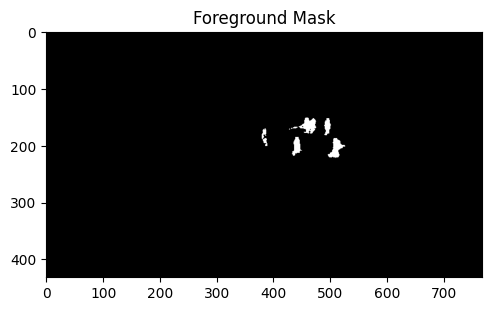

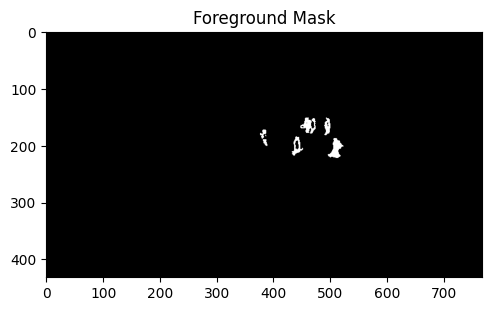

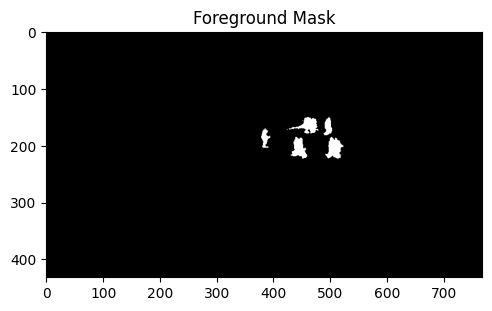

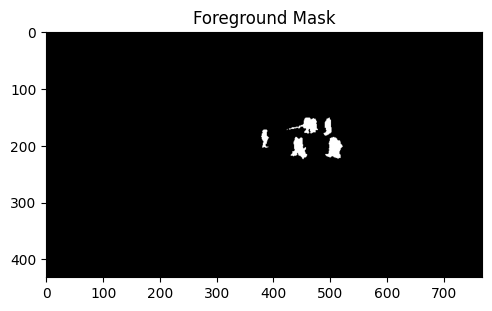

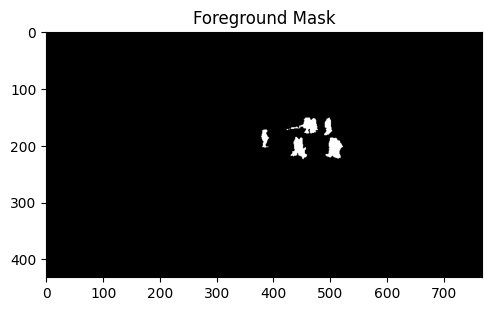

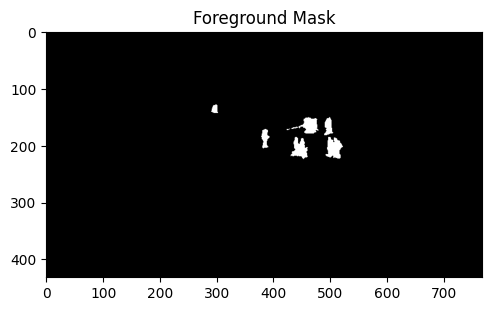

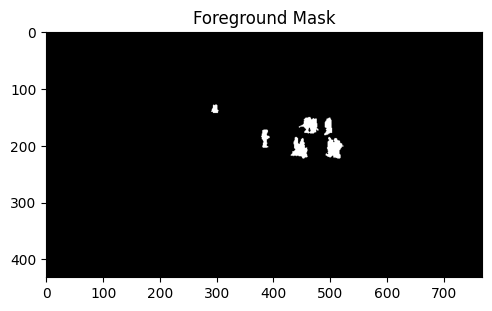

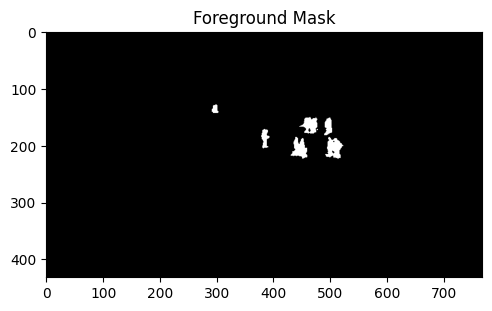

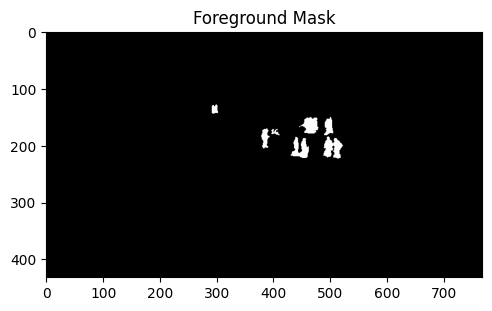

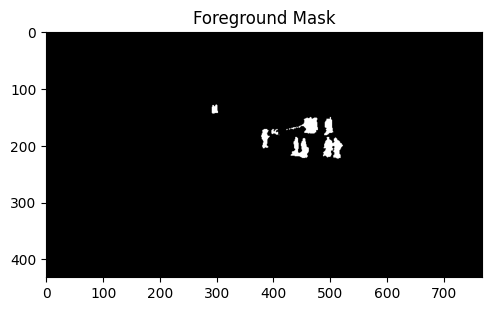

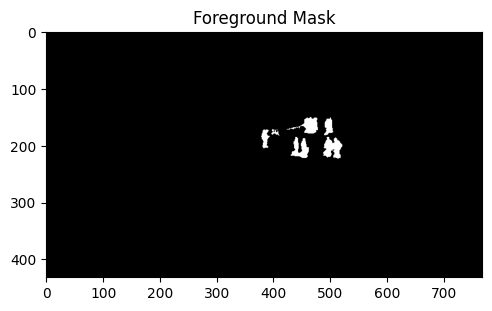

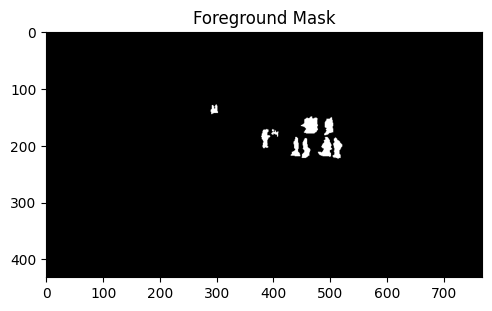

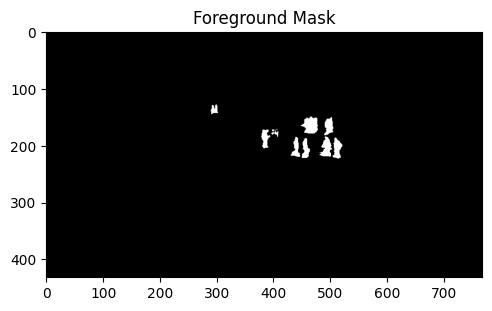

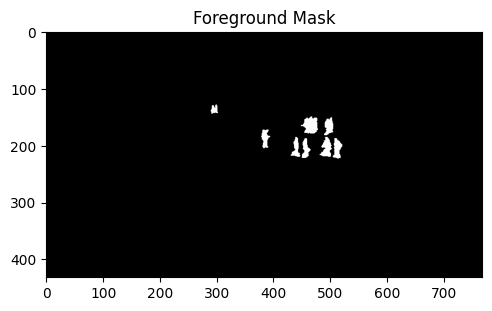

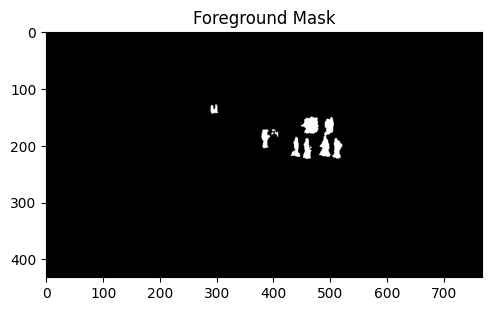

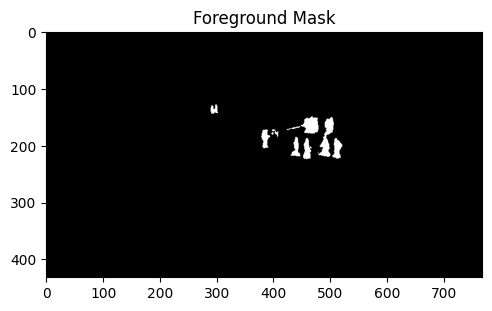

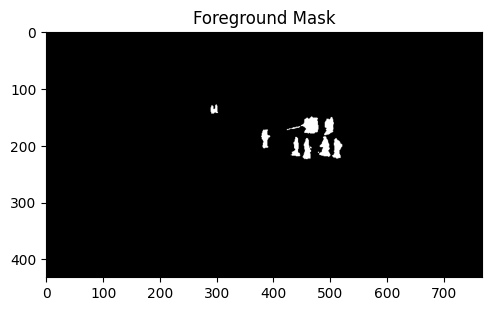

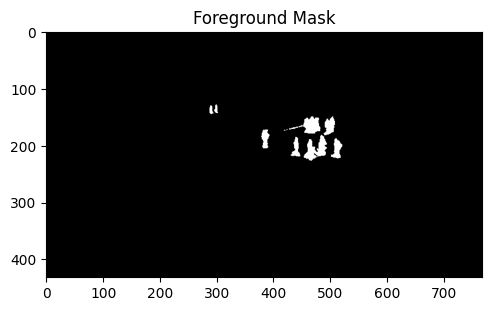

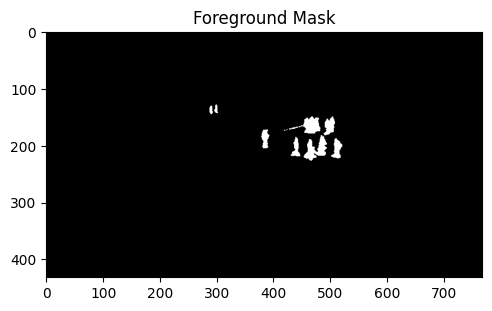

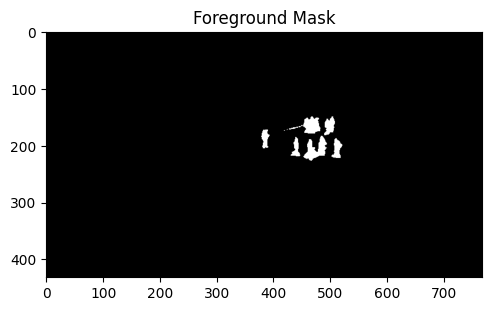

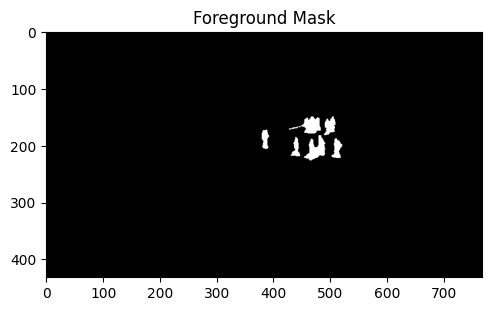

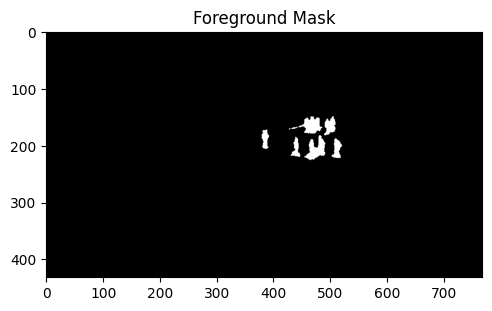

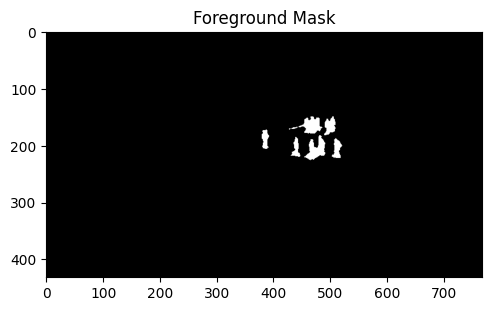

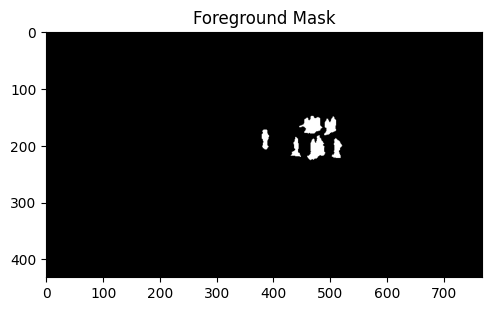

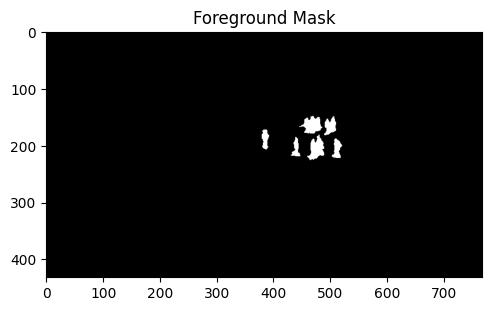

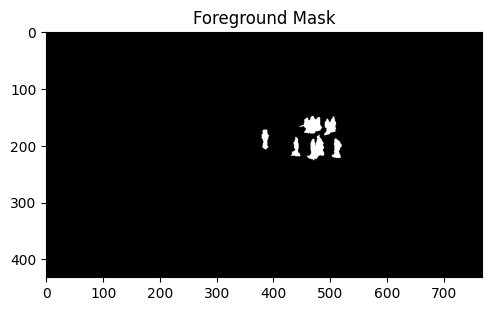

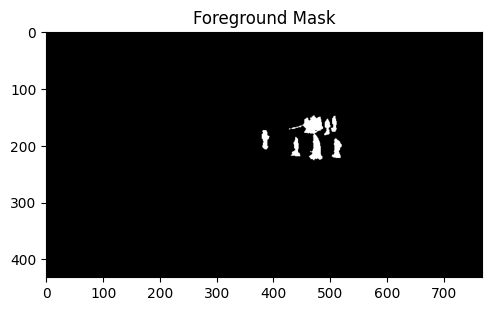

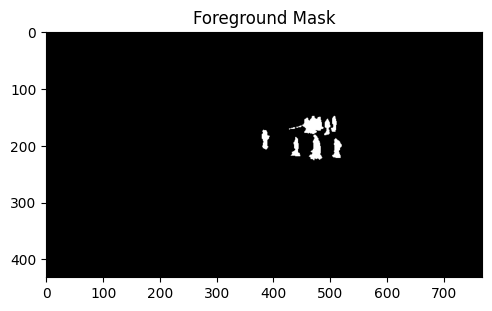

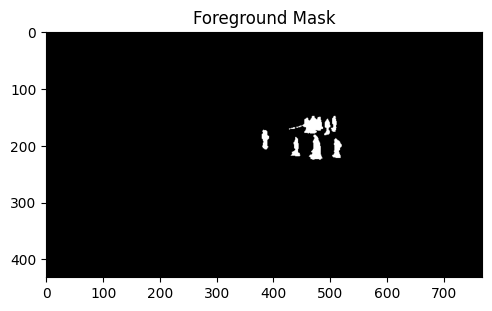

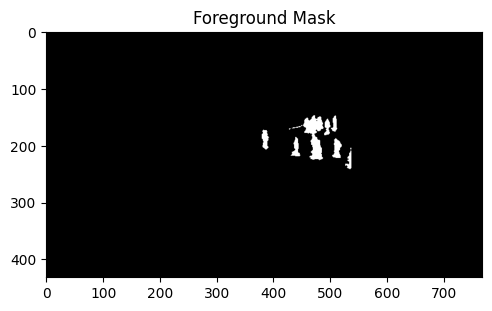

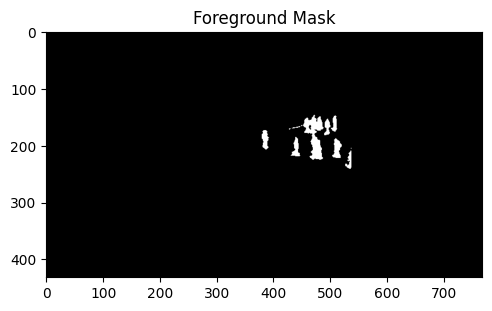

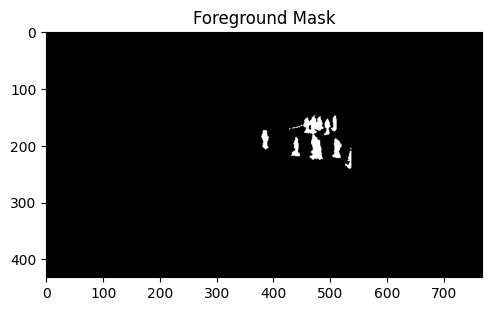

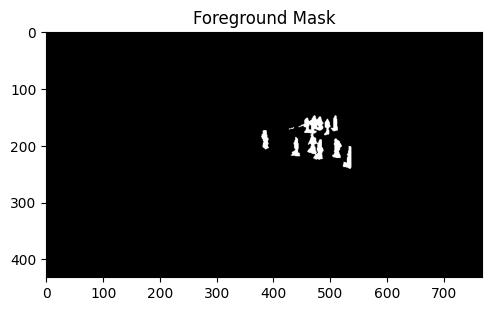

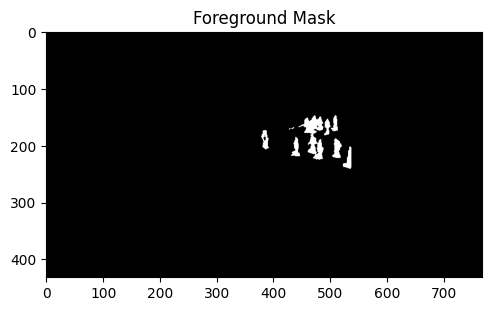

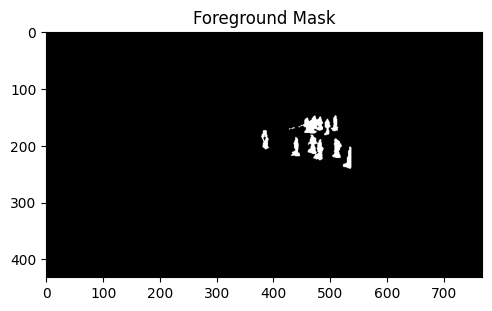

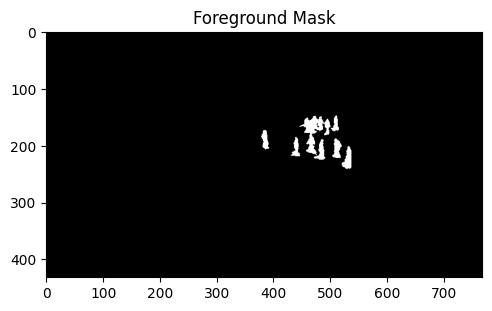

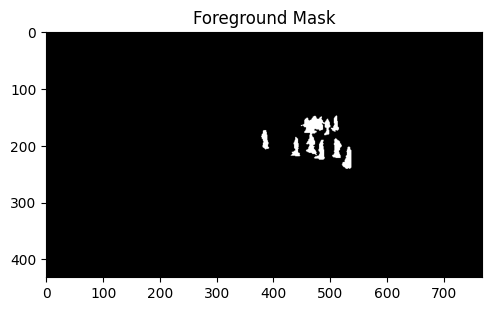

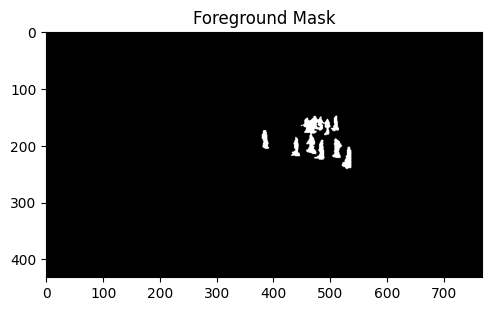

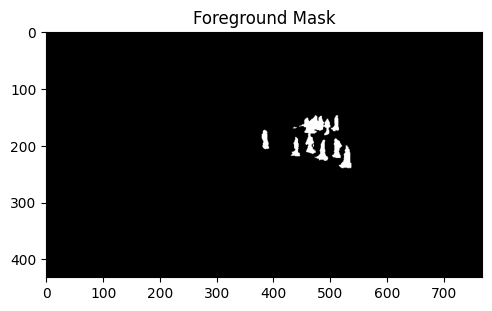

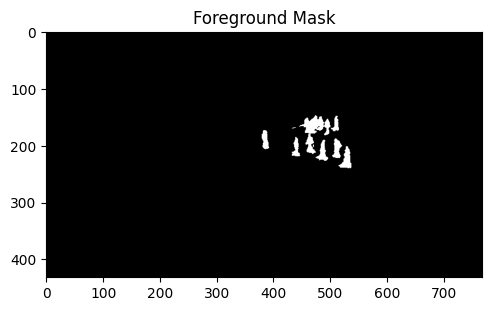

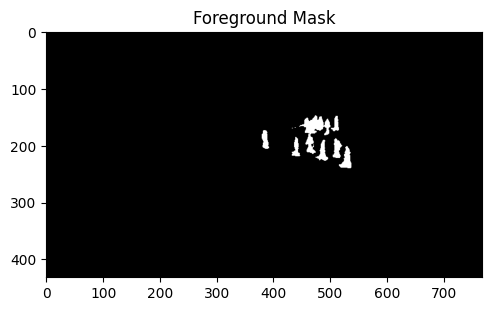

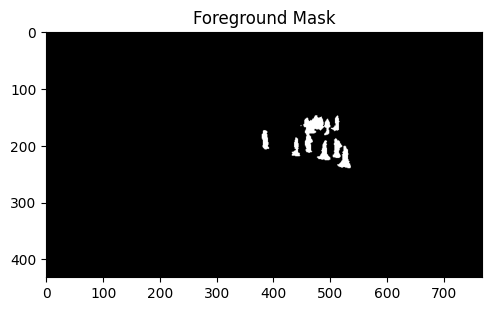

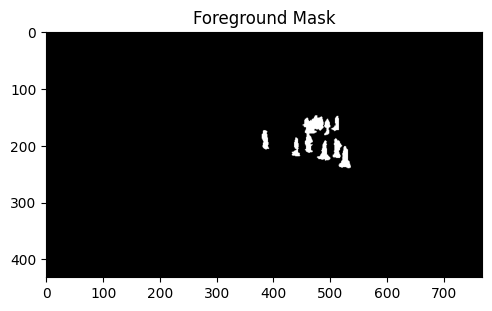

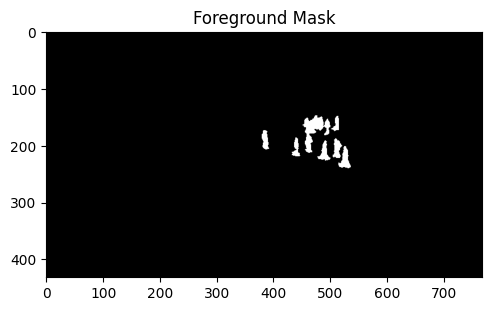

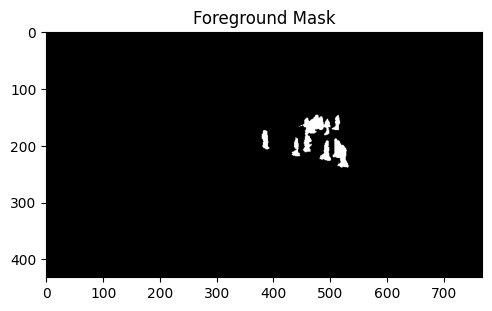

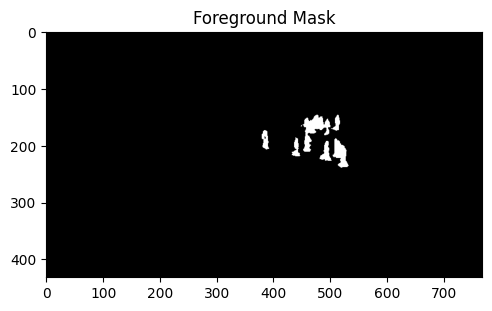

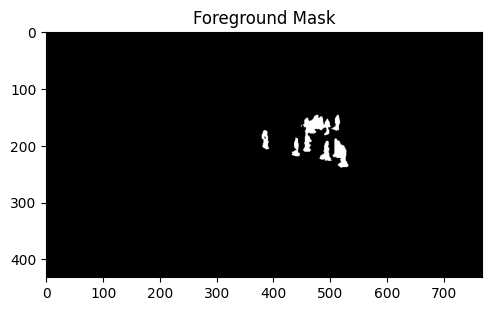

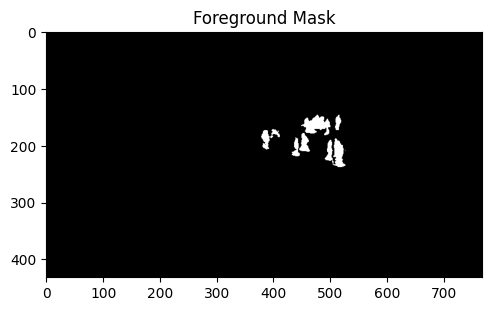

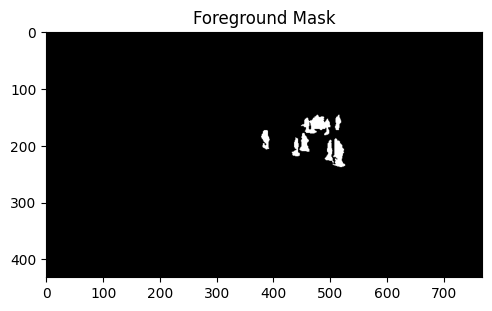

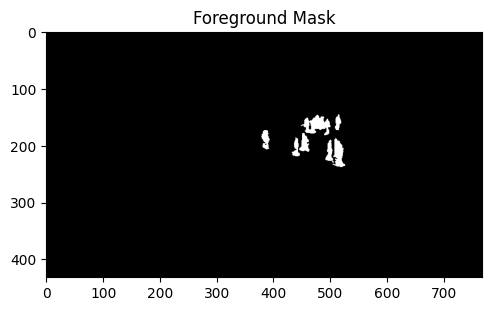

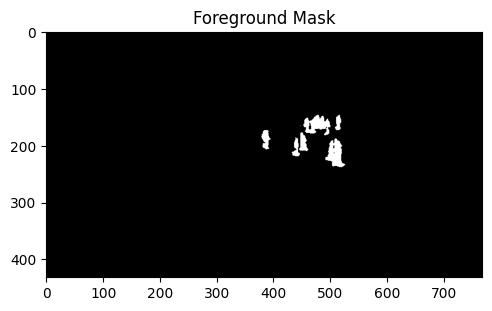

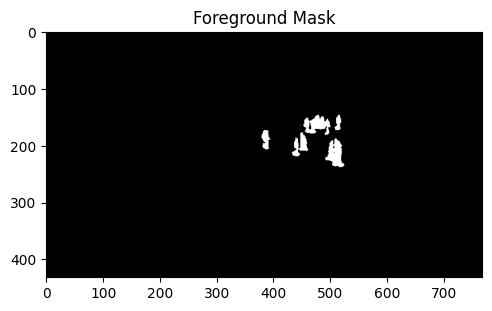

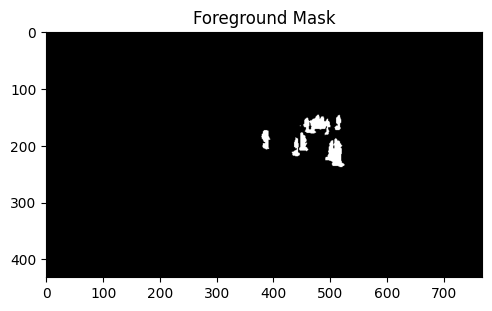

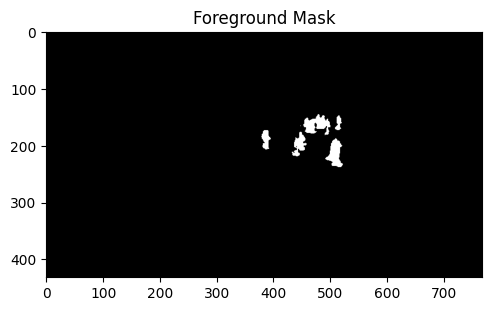

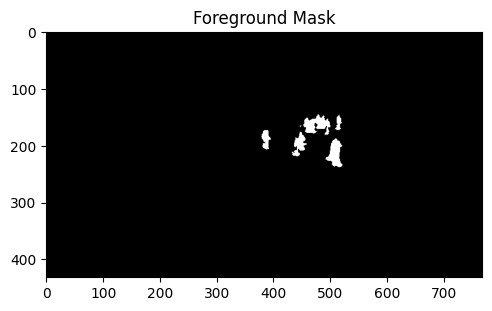

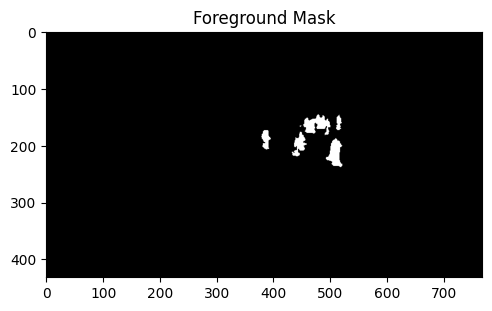

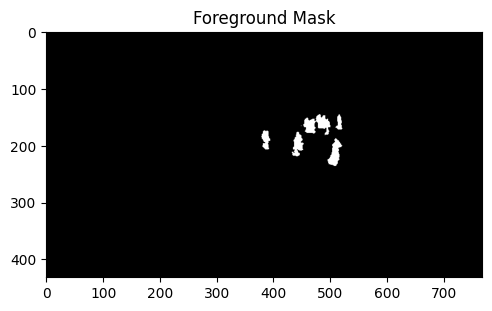

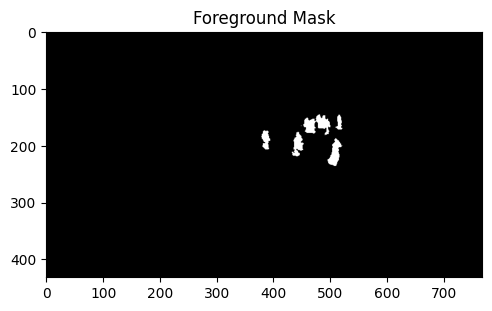

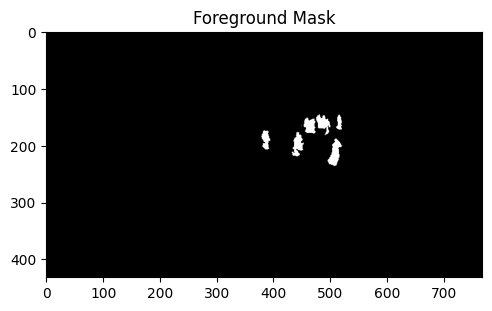

In [3]:
cap = cv2.VideoCapture('walking_short_clip.mp4')

# Get the height and width of the frame (required to be an interfer)
w = int(cap.get(3))
h = int(cap.get(4))

# Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.
out = cv2.VideoWriter('walking_output_AGMM.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 30, (w, h))

# Initlaize background subtractor
foreground_background = cv2.bgsegm.createBackgroundSubtractorGSOC()

# Loop once video is successfully loaded
while True:

    ret, frame = cap.read()
    if ret:
      # Apply background subtractor to get our foreground mask
      foreground_mask = foreground_background.apply(frame)
      out.write(foreground_mask)
      imshow("Foreground Mask", foreground_mask)
    else:
      break

cap.release()
out.release()

## **Foreground Subtraction**

In [4]:
cap = cv2.VideoCapture('walking_short_clip.mp4')

# Get the height and width of the frame (required to be an interfer)
w = int(cap.get(3))
h = int(cap.get(4))

# Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.
out = cv2.VideoWriter('walking_output.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 30, (w, h))
ret, frame = cap.read()

# Create a flaot numpy array with frame values
average = np.float32(frame)

while True:
    # Get frame
    ret, frame = cap.read()

    if ret:

      # 0.01 is the weight of image, play around to see how it changes
      cv2.accumulateWeighted(frame, average, 0.01)

      # Scales, calculates absolute values, and converts the result to 8-bit
      background = cv2.convertScaleAbs(average)

      imshow('Input', frame)
      imshow('Disapearing Background', background)
      out.write(background)

    else:
      break

cap.release()
out.release()

Output hidden; open in https://colab.research.google.com to view.

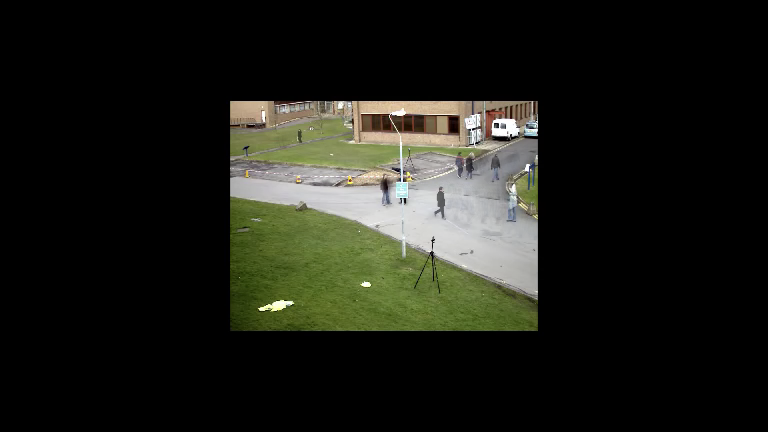

In [5]:
cv2_imshow(background)

### **Background Substraction KKN**

The parameters if you wish to veer away from the default settings:

- **history** is the number of frames used to build the statistic model of the background. The smaller the value is, the faster changes in the background will be taken into account by the model and thus be considered as background. And vice versa.
- **dist2Threshold** is a threshold to define whether a pixel is different from the background or not. The smaller the value is, the more sensitive movement detection is. And vice versa.
- **detectShadows** : If set to true, shadows will be displayed in gray on the generated mask. (Example bellow)

https://docs.opencv.org/master/de/de1/group__video__motion.html#gac9be925771f805b6fdb614ec2292006d

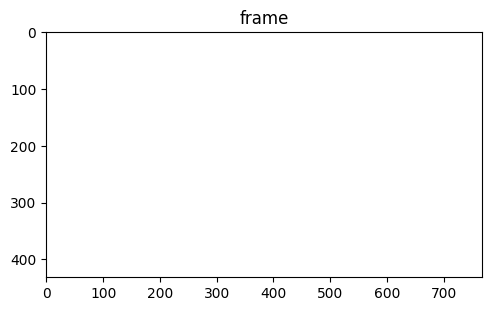

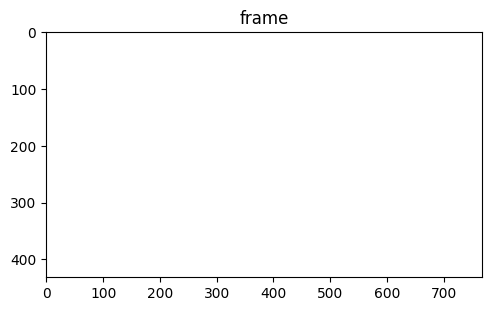

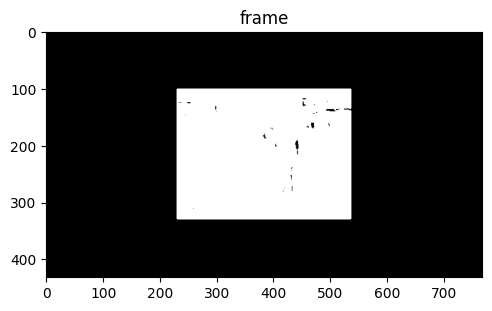

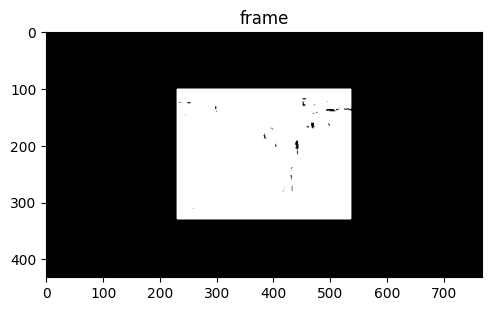

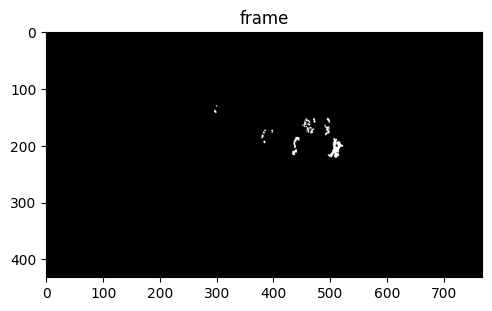

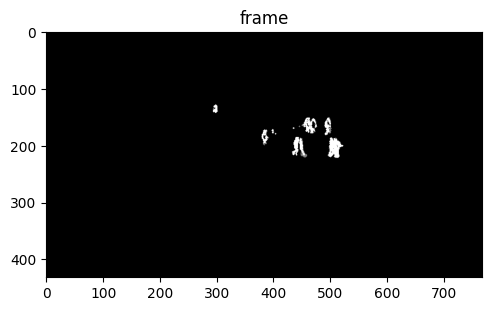

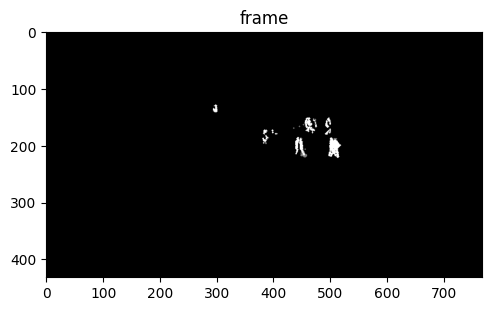

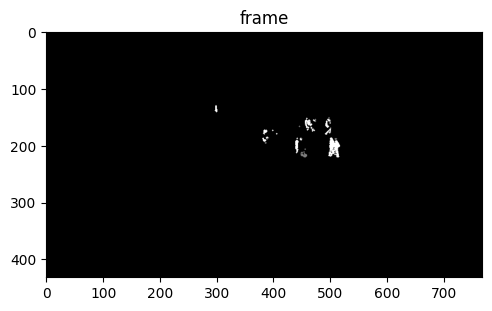

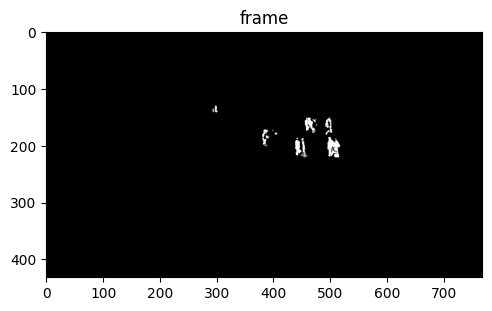

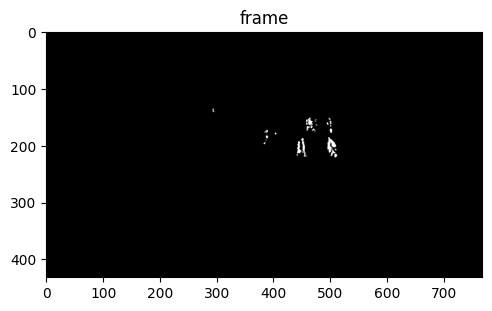

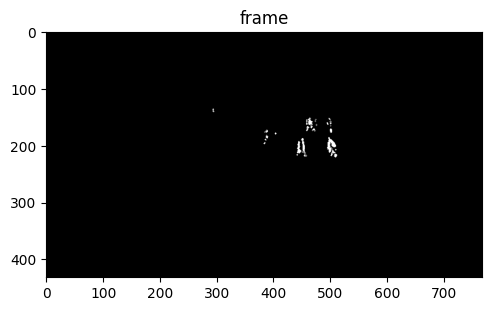

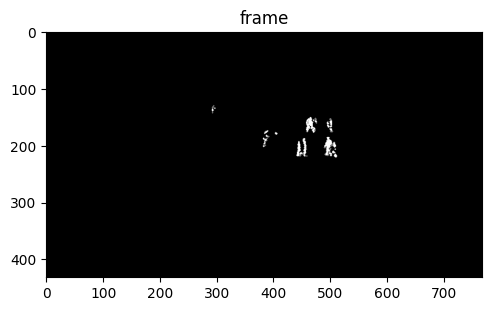

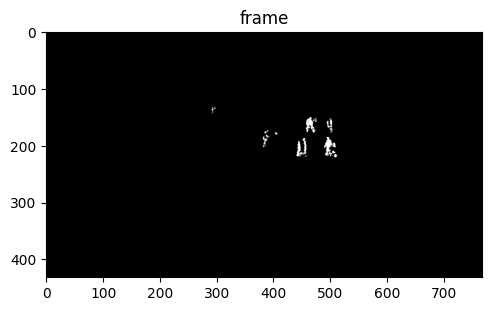

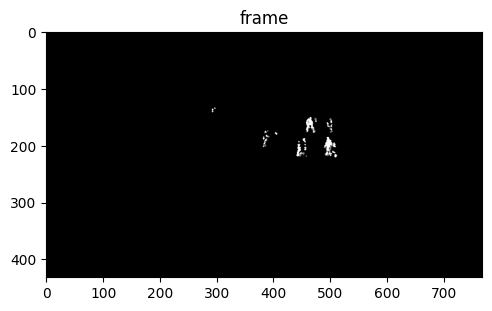

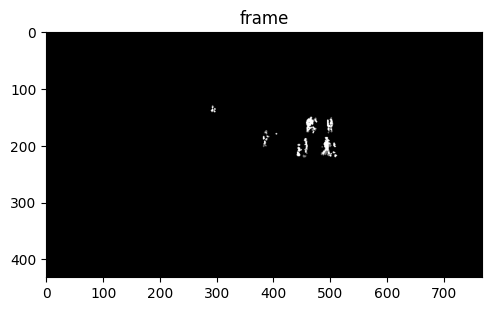

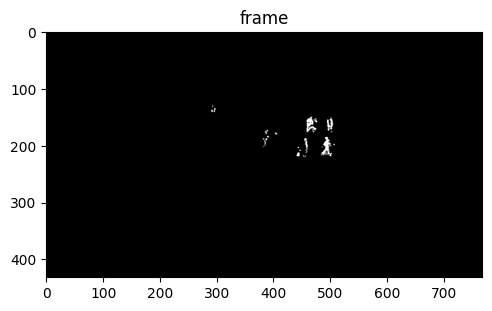

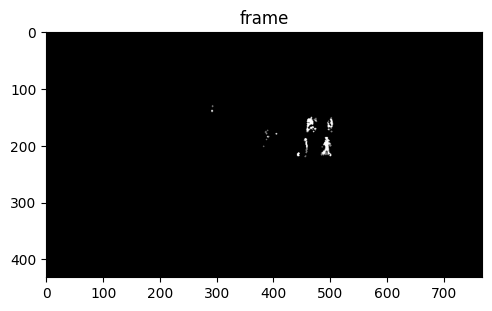

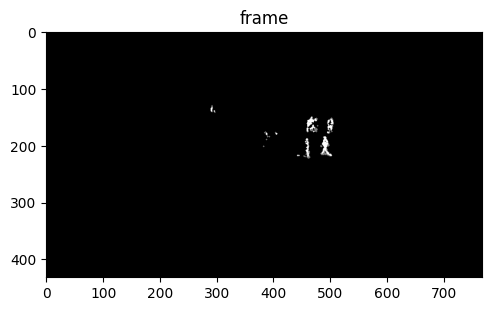

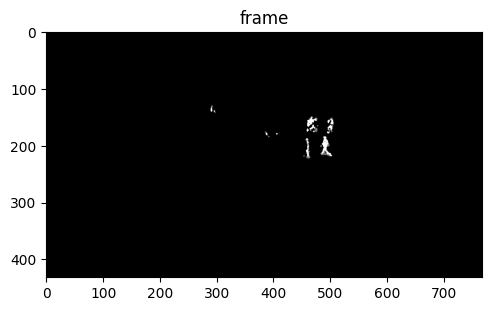

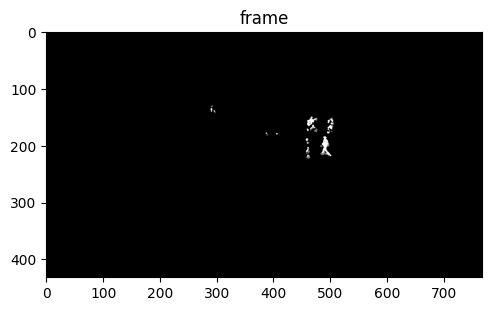

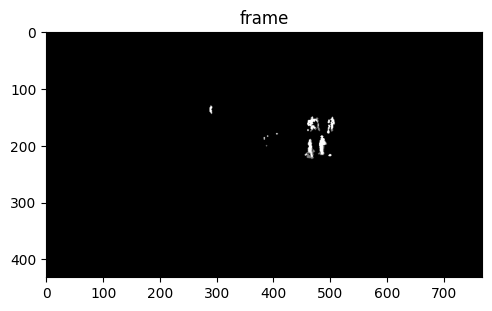

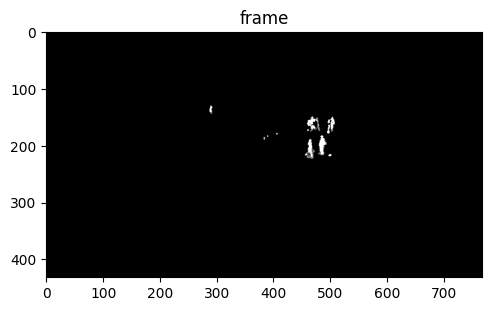

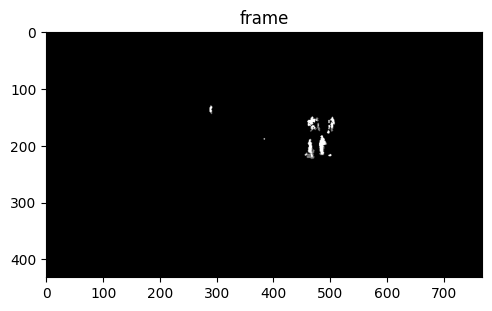

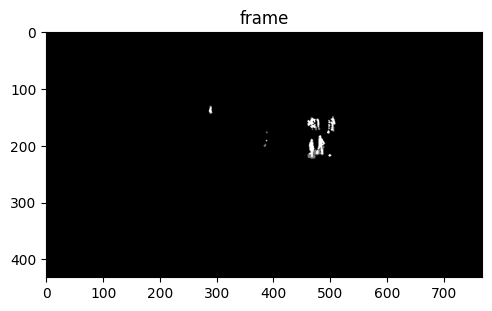

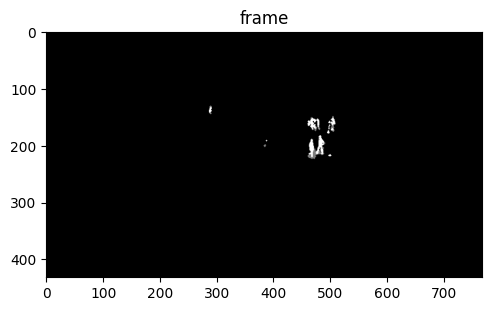

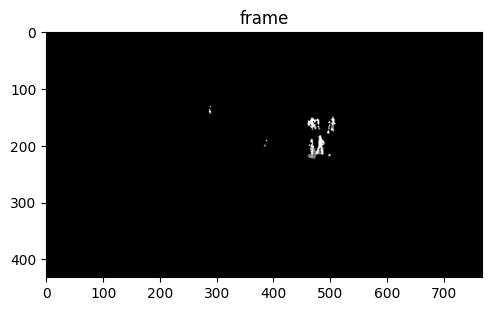

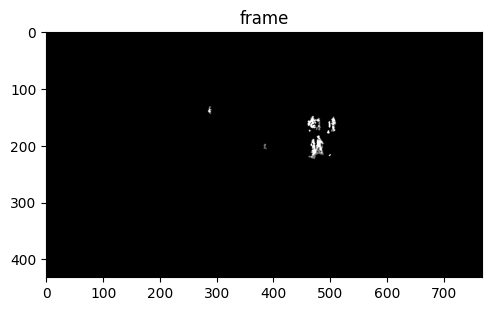

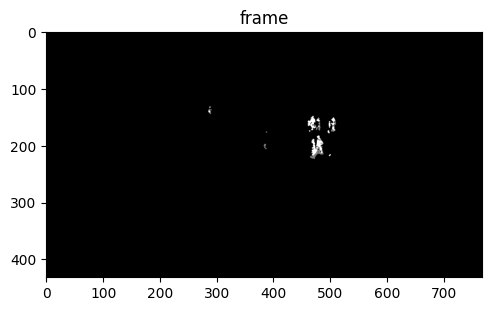

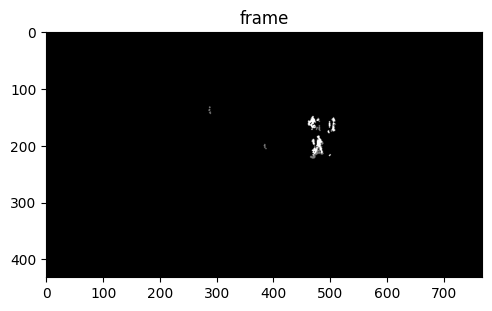

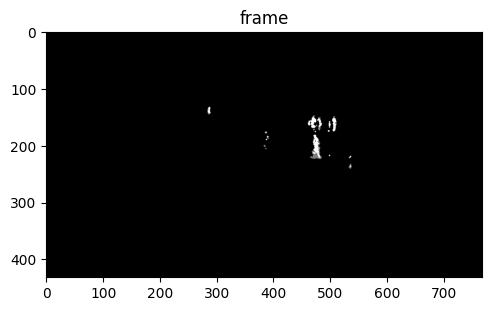

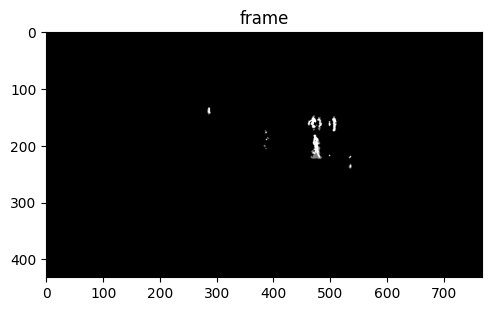

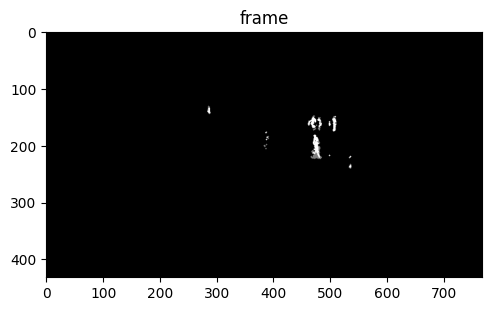

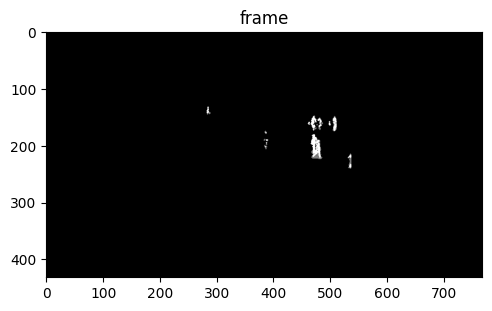

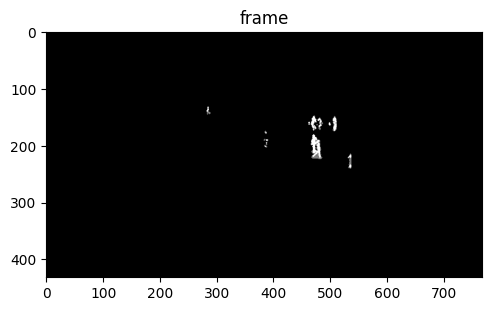

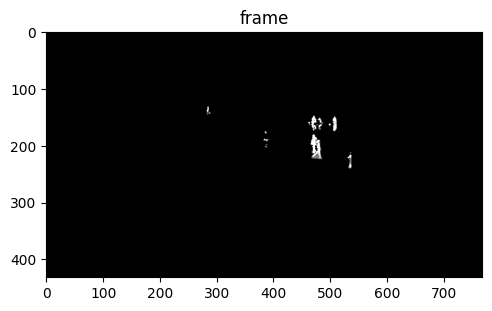

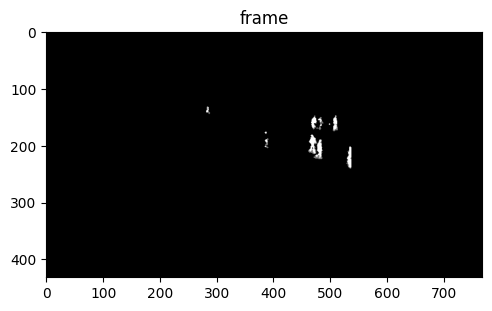

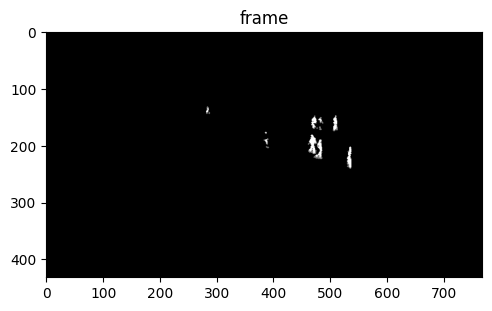

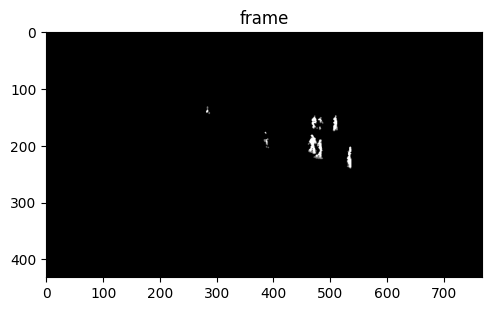

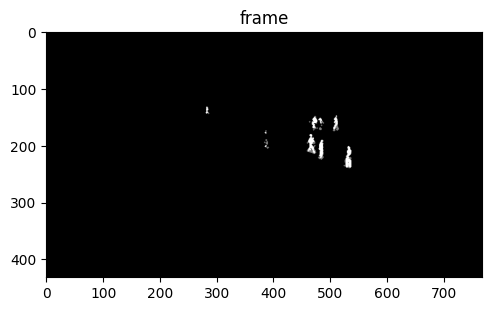

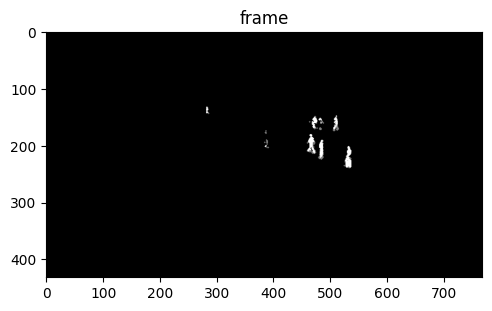

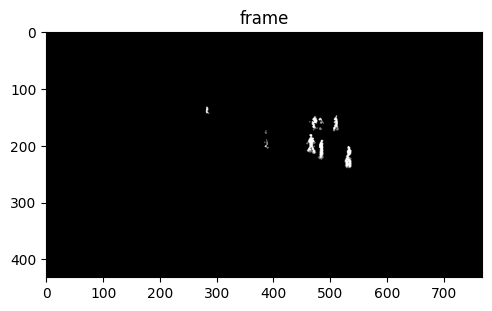

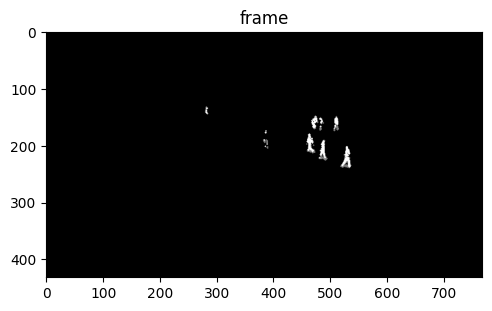

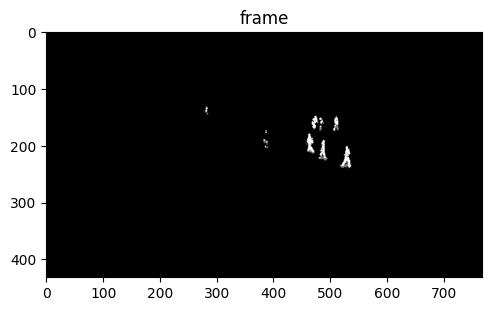

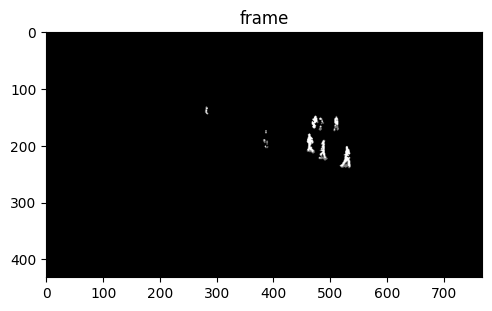

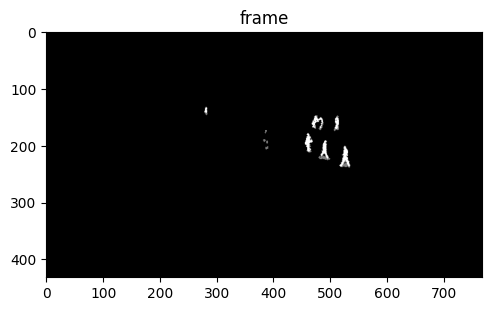

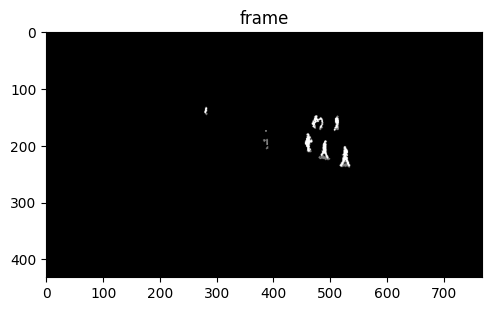

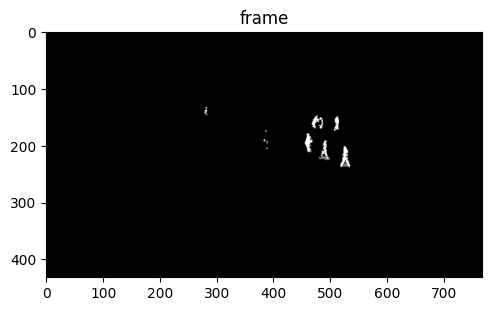

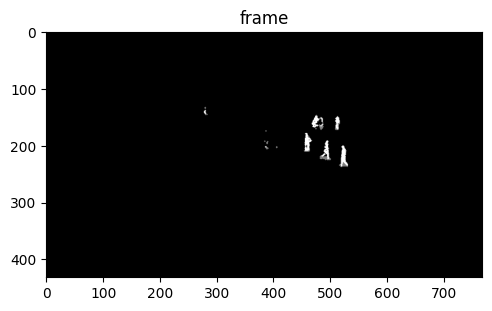

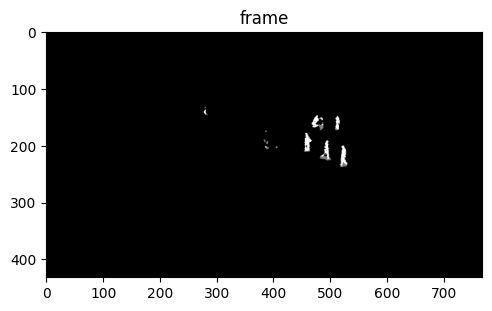

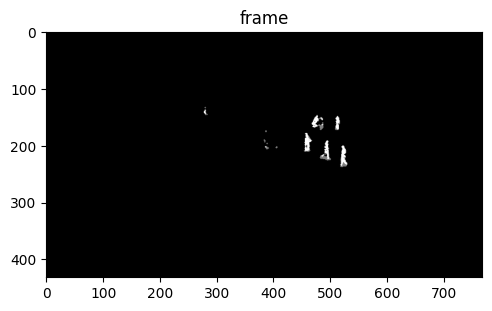

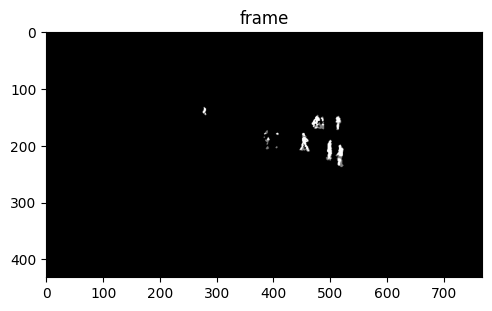

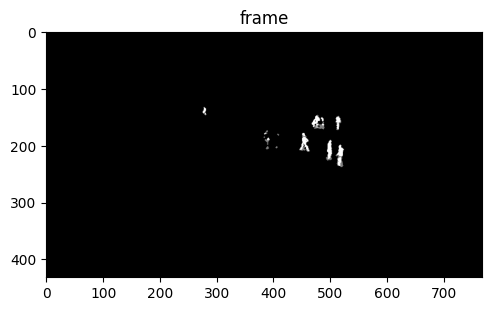

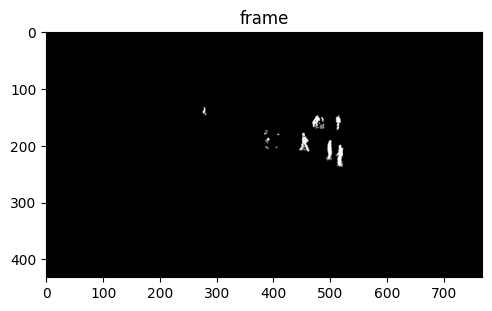

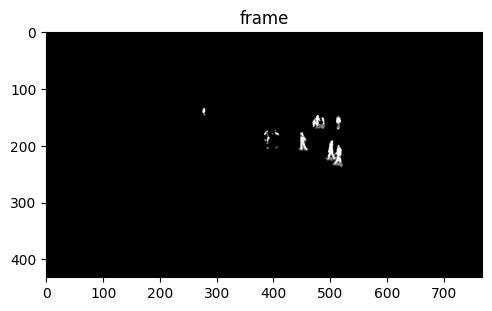

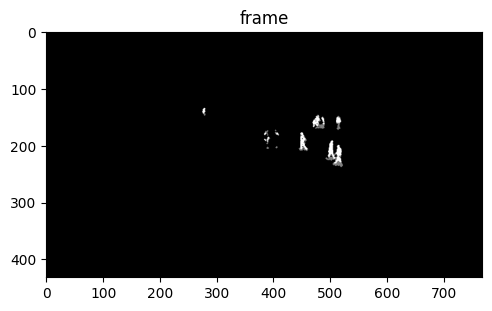

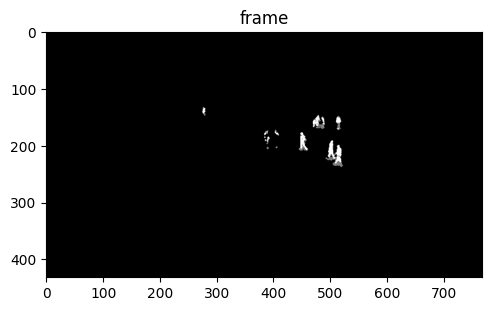

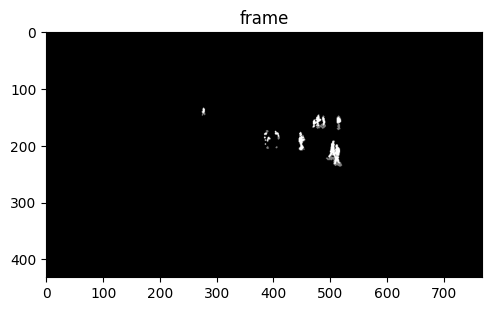

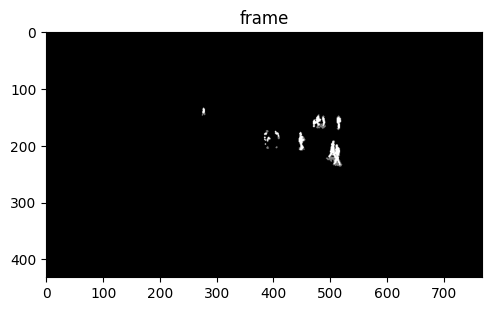

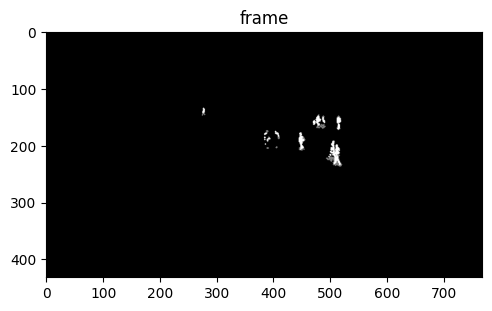

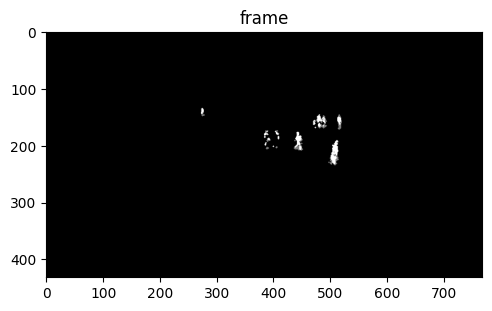

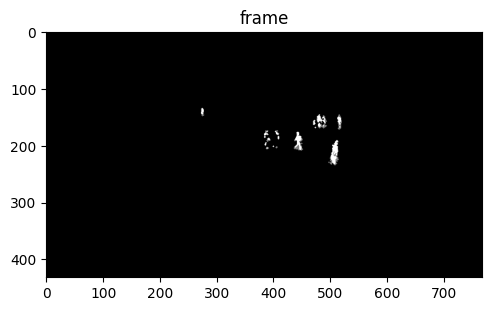

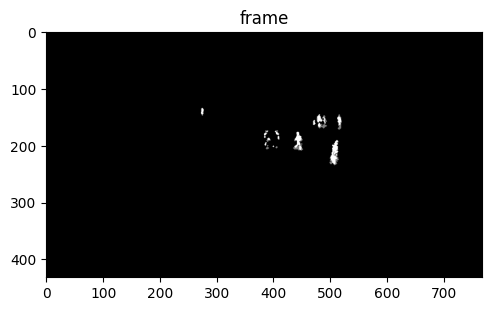

In [6]:
cap = cv2.VideoCapture('walking_short_clip.mp4')

# Get the height and width of the frame (required to be an interfer)
w = int(cap.get(3))
h = int(cap.get(4))

# Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.
out = cv2.VideoWriter('walking_output.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 30, (w, h))

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
fgbg = cv2.createBackgroundSubtractorKNN()

while(1):
    ret, frame = cap.read()

    if ret:
      fgmask = fgbg.apply(frame)
      fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)

      imshow('frame', fgmask)
    else:
      break

cap.release()
out.release()